In [2]:
%%time
import malaya

CPU times: user 4.85 s, sys: 1.23 s, total: 6.08 s
Wall time: 7.47 s


## GPT2

Malaya provided Pretrained GTP2 model, specific to Malay, we called it GTP2-Bahasa. This interface not able us to use it to do custom training.

GPT2-Bahasa was pretrained on ~0.9 billion words, and below is the list of dataset we trained,

1. [dumping wikipedia (222MB)](https://github.com/huseinzol05/Malaya-Dataset#wikipedia-1).
2. [local news (257MB)](https://github.com/huseinzol05/Malaya-Dataset#public-news).
3. [local parliament text (45MB)](https://github.com/huseinzol05/Malaya-Dataset#parliament).
4. [IIUM Confession (74MB)](https://github.com/huseinzol05/Malaya-Dataset#iium-confession).
5. [Wattpad (74MB)](https://github.com/huseinzol05/Malaya-Dataset#wattpad).
6. [Academia PDF (42MB)](https://github.com/huseinzol05/Malaya-Dataset#academia-pdf).
7. [Common-Crawl (3GB)](https://github.com/huseinzol05/malaya-dataset#common-crawl).

If you want to download pretrained model for GPT2-Bahasa and use it for custom transfer-learning, you can download it here, https://github.com/huseinzol05/Malaya/tree/master/pretrained-model/gpt2, some notebooks to help you get started.

**Here we hope these models are not use to finetune for spreading fake news**.

Or you can simply use [Transformers](https://huggingface.co/models?filter=malay&search=gpt2) to try GPT2-Bahasa models from Malaya, simply check available models from here, https://huggingface.co/models?filter=malay&search=gpt2

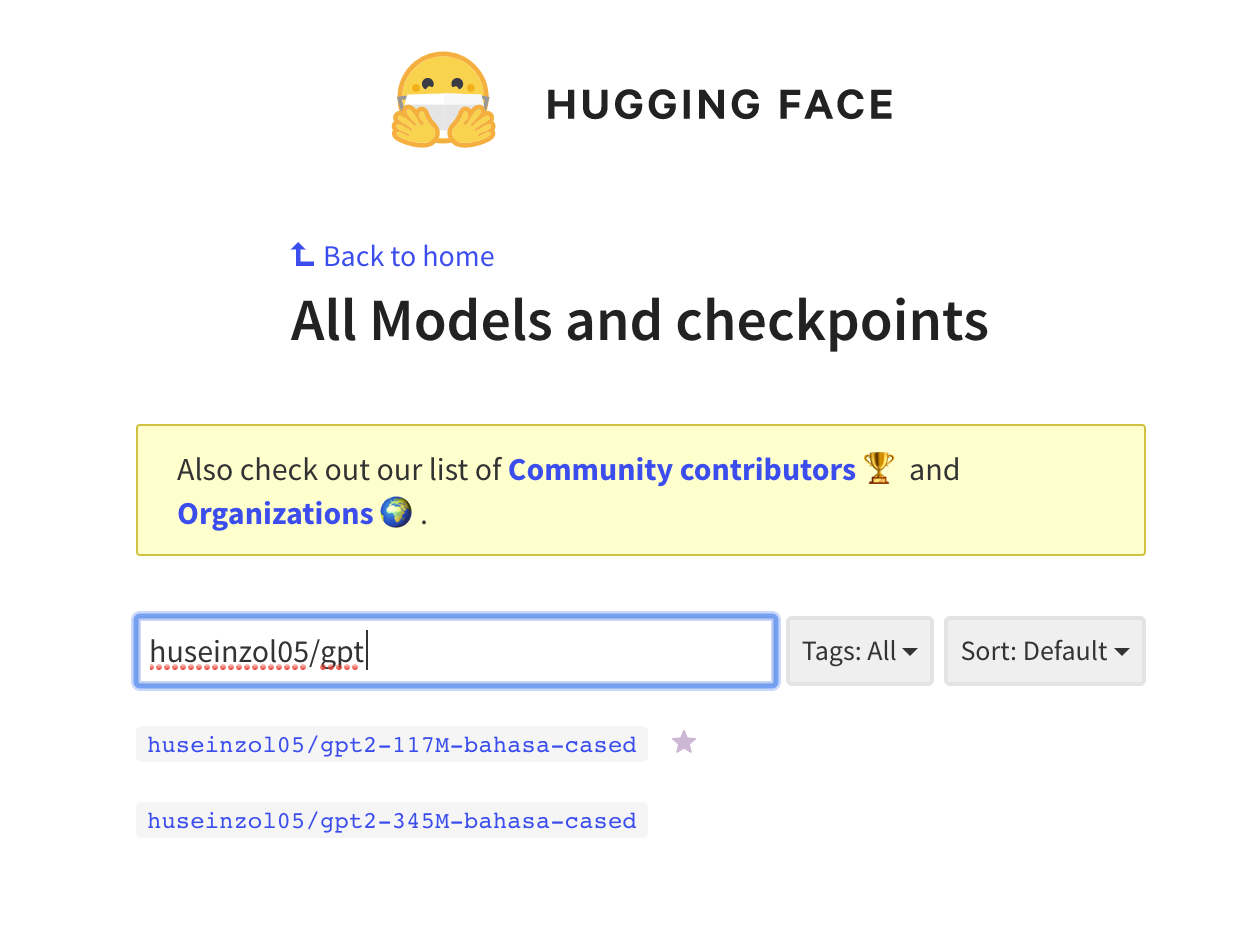

In [1]:
from IPython.core.display import Image, display

display(Image('gpt2.png', width=500))

#### load model

GPT2-Bahasa only available `117M` and `345M` models.

1. `117M` size around 442MB.
2. `345M` is around 1.2GB.

In [3]:
model = malaya.generator.gpt2(model = '117M')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




INFO:tensorflow:Restoring parameters from /Users/huseinzolkepli/Malaya/gpt2/117M/gpt2-bahasa-117M/model.ckpt


In [4]:
string = 'ceritanya sebegini, aku bangun pagi baca surat khabar berita harian, tetiba aku nampak cerita seram, '
print(model.generate(string))

ceritanya sebegini, aku bangun pagi baca surat khabar berita harian, tetiba aku nampak cerita seram, ara aku yang lain keluar, aku pandang cerita tapi tak ingat, aku takut dan bimbang aku terpaksa marah kerana hati aku yang berada di sekeliling aku tadi tak putus-putus.
Dalam diam, aku juga merasa kagum dan terharu bila aku bangun pagi untuk bangun dan tengok kisah seram ni, masa tu aku terus pandang, bila aku berada dalam bilik yang indah, aku tahu tentang benda yang nak diperkatakan.
“Tu sikit, dengan banyak masa aku nak keluar dan keluar aku dah mula bangun pagi, aku nak keluar lagi, lepas tu nanti terus masuk ke bilik sambil nampak benda yang tak ada yang nak diperkatakan.
Tak tau cerita tu macam benda yang boleh aku buat kalau rasa macam cerita.
Sampai di bilik, aku pun rasa macam, benda yang nak diperkatakan tu bukan benda yang perlu aku buat.
Macam tak percaya apa yang aku buat ni?
Mungkin benda yang nak diperkatakan itu boleh buat aku jugak, cuma benda yang boleh bagi aku kata 

In [6]:
model = malaya.generator.gpt2(model = '345M')

INFO:tensorflow:Restoring parameters from /Users/huseinzolkepli/Malaya/gpt2/345M/gpt2-bahasa-345M/model.ckpt


In [7]:
string = 'ceritanya sebegini, aku bangun pagi baca surat khabar berita harian, tetiba aku nampak cerita seram, '
print(model.generate(string))

ceritanya sebegini, aku bangun pagi baca surat khabar berita harian, tetiba aku nampak cerita seram, omputeh-uteh cerita lama-lama, seram tak boleh bayang
Sebelum kejadian, dalam 2 jam aku buat panggilan polis , lepas tu kira la sendiri nak ke lokasi.
Tengok cerita lama..
Sekarang ni, apa yang aku lalui, kita yang jaga diri, kita yang jaga kesihatan dan juga kita yang jaga minda dalam hidup.
Maka, inilah jalan penyelesaian terbaiknya.
Jangan lupakan manusia
Orang yang paling ditakuti untuk berjaya dalam hidup, tidak akan jumpa yang tersayang!
Jangan rosakkan masa depannya, ingatlah apa yang kita nak buat, walaupun pahit untuk ditelan.
Jangan lupakan orang lain - masa depan mereka.
Jangan lupakan orang - masa itulah kita yang lebih dicintai.
Jangan lupakan orang - orang yang kita sayang, mereka bukan orang yang tersayang!
Jangan lupakan orang - orang yang kita cinta, mereka cinta pada kita.
Jangan lupakan diri - diri kita - yang kita punya, yang kita tinggal adalah masa lalu kita.
Janga

## Wordvector augmentation

Let say you have a very limited labelled corpus, and you want to add more, but labelling is very costly.

So, text augmentation! You can use wordvector to replace words with similar semantics!

```python
def wordvector_augmentation(
    string,
    wordvector,
    threshold = 0.5,
    top_n = 5,
    soft = False,
    cleaning_function = None,
):
    """
    augmenting a string using wordvector.

    Parameters
    ----------
    string: str
    wordvector: object
        wordvector interface object.
    threshold: float, optional (default=0.5)
        random selection for a word.
    soft: bool, optional (default=False)
        if True, a word not in the dictionary will be replaced with nearest jarowrinkler ratio.
        if False, it will throw an exception if a word not in the dictionary.
    top_n: int, (default=5)
        number of nearest neighbors returned.
    cleaning_function: function, (default=None)
        function to clean text.

    Returns
    -------
    result: list
    """
```  

In [2]:
string = 'saya suka makan ayam dan ikan'

In [3]:
vocab_wiki, embedded_wiki = malaya.wordvector.load_wiki()
word_vector_wiki = malaya.wordvector.load(embedded_wiki, vocab_wiki)

In [4]:
augmented = malaya.generator.wordvector_augmentation(string,
                                  word_vector_wiki,
                                  soft=True)
augmented

['saya suka makan ayam dan ikan',
 'saya suka makan ayam serta ayam',
 'saya suka makan ayam atau ular',
 'saya suka makan ayam mahupun keju',
 'saya suka makan ayam tetapi lembu']

In [5]:
text = 'Perdana Menteri berkata, beliau perlu memperoleh maklumat terperinci berhubung isu berkenaan sebelum kerajaan dapat mengambil sebarang tindakan lanjut. Bagaimanapun, beliau yakin masalah itu dapat diselesaikan dan pentadbiran kerajaan boleh berfungsi dengan baik.'

In [6]:
augmented = malaya.generator.wordvector_augmentation(text,
                                  word_vector_wiki,
                                  soft=True)
augmented

['Perdana Menteri berkata , beliau perlu memperoleh maklumat terperinci berhubung isu berkenaan sebelum kerajaan dapat mengambil sebarang tindakan lanjut . Bagaimanapun , beliau yakin masalah itu dapat diselesaikan dan pentadbiran kerajaan boleh berfungsi dengan baik .',
 'Perdana Menteri berkata , beliau perlu memperoleh data terperinci berhubung isu berkaitan sebelum pemerintah dapat mendapat segala tindakan lanjut . Bagaimanapun , dia sedar masalah itu boleh diselesaikan serta pentadbiran pemerintah boleh berfungsi dengan baik .',
 'Perdana Menteri berkata , beliau perlu memperoleh bacaan terperinci berhubung isu tertentu sebelum perlembagaan dapat menghabiskan sesuatu tindakan lanjut . Bagaimanapun , baginda bimbang masalah itu harus diselesaikan atau pentadbiran perlembagaan boleh berfungsi dengan baik .',
 'Perdana Menteri berkata , beliau perlu memperoleh penjelasan terperinci berhubung isu tersebut sebelum kesultanan dapat mengubah suatu tindakan lanjut . Bagaimanapun , mereka 

## Transformer augmentation

Problem with wordvector, it just replaced a word for near synonym without understood the whole sentence context, so, Transformer comes to the rescue!

```python
def transformer_augmentation(
    string,
    model,
    threshold = 0.5,
    top_p = 0.8,
    top_k = 100,
    temperature = 0.8,
    top_n = 5,
    cleaning_function = None,
):

    """
    augmenting a string using transformer + nucleus sampling / top-k sampling.

    Parameters
    ----------
    string: str
    model: object
        transformer interface object. Right now only supported BERT.
    threshold: float, optional (default=0.5)
        random selection for a word.
    top_p: float, optional (default=0.8)
        cumulative sum of probabilities to sample a word. If top_n bigger than 0, the model will use nucleus sampling, else top-k sampling.
    top_k: int, optional (default=100)
        k for top-k sampling.
    temperature: float, optional (default=0.8)
        logits * temperature.
    top_n: int, (default=5)
        number of nearest neighbors returned.
    cleaning_function: function, (default=None)
        function to clean text.

    Returns
    -------
    result: list
    """
```    

In [7]:
model = malaya.transformer.load(model = 'albert')


INFO:tensorflow:loading sentence piece model





Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Use `tf.random.categorical` instead.





INFO:tensorflow:Restoring parameters from /Users/huseinzolkepli/Malaya/albert-model/base/albert-base/model.ckpt


In [8]:
augmented = malaya.generator.transformer_augmentation(text, model)
augmented

['Perdana Menteri berkata, pihaknya perlu memperoleh maklumat terperinci berhubung isu berkenaan sebelum kerajaan tidak menyelesaikan alih tindakan lanjut. Bagaimanapun, beliau yakin masalah itu dapat diselesaikan dan semua kerajaan boleh pulih dengan baik.',
 'Perdana Menteri berkata, kerajaan perlu memperoleh maklumat terperinci daripada masalah berkenaan sebelum kerajaan tidak mengendalikan alih tindakan lanjut. Bagaimanapun, beliau berharap masalah itu dapat diselesaikan kerana semua kerajaan boleh diselesaikan dengan baik.',
 'Perdana Menteri berkata, kerajaan perlu memperoleh maklumat terperinci daripada masalah berkenaan sebelum kerajaan tidak menyelesaikan alih tindakan lanjut. Bagaimanapun, beliau yakin masalah itu dapat diselesaikan supaya semua kerajaan boleh diselesaikan dengan baik.',
 'Perdana Menteri berkata, pihaknya perlu memperoleh maklumat terperinci mengenai isu berkenaan sebelum kerajaan tidak mengendalikan alih tindakan lanjut. Bagaimanapun, beliau berharap masala

## ngrams

You can generate ngrams pretty easy using this interface,

```python
def ngrams(
    sequence,
    n: int,
    pad_left = False,
    pad_right = False,
    left_pad_symbol = None,
    right_pad_symbol = None,
):
    """
    generate ngrams.

    Parameters
    ----------
    sequence : List[str]
        list of tokenize words.
    n : int
        ngram size

    Returns
    -------
    ngram: list
    """
```

In [4]:
string = 'saya suka makan ayam'

list(malaya.generator.ngrams(string.split(), n = 2))

[('saya', 'suka'), ('suka', 'makan'), ('makan', 'ayam')]

In [6]:
list(malaya.generator.ngrams(string.split(), n = 2, pad_left = True, pad_right = True))

[(None, 'saya'),
 ('saya', 'suka'),
 ('suka', 'makan'),
 ('makan', 'ayam'),
 ('ayam', None)]

In [7]:
list(malaya.generator.ngrams(string.split(), n = 2, pad_left = True, pad_right = True,
                            left_pad_symbol = 'START'))

[('START', 'saya'),
 ('saya', 'suka'),
 ('suka', 'makan'),
 ('makan', 'ayam'),
 ('ayam', None)]

In [8]:
list(malaya.generator.ngrams(string.split(), n = 2, pad_left = True, pad_right = True,
                            left_pad_symbol = 'START', right_pad_symbol = 'END'))

[('START', 'saya'),
 ('saya', 'suka'),
 ('suka', 'makan'),
 ('makan', 'ayam'),
 ('ayam', 'END')]